# Ablation of Spectral Consistency

This notebook plots the effect of removing colour information by randomly shuffling the colour channels of the inputs to the network. The distribution plots here show that spatial opponency remains, while spectral opponency is completely removed. It corresponds to Figures 3(b) and 3(c) in the paper.

**Note**: The easiest way to use this is as a colab notebook, which allows you to dive in with no setup.

## Load Dependencies - Colab Only

In [ ]:
from os.path import exists
if not exists('opponency.zip'):
    !wget -O opponency.zip https://github.com/ecs-vlc/opponency/archive/master.zip
    !unzip -qq opponency.zip
    !mv opponency-master/* ./
    !rm -r opponency-master

## Generate Plots

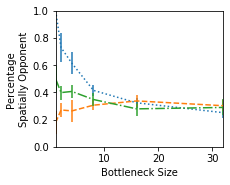

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from statistics import load

plt.figure(figsize=(3,2.5))

Ch_frame_spatial = pd.read_pickle('logs/spatial-ch.pd')
Ch_opps = load.spatial(Ch_frame_spatial, 'spatially opponent')
retina2 = Ch_opps[Ch_opps['layer'] == 'retina_relu2']
ventral0 = Ch_opps[Ch_opps['layer'] == 'ventral_relu0']
ventral1 = Ch_opps[Ch_opps['layer'] == 'ventral_relu1']

plt.errorbar(retina2['n_bn'], retina2['mean_rel_amount'], yerr=retina2['std_rel_amount'], label='Retina2', linestyle=':')
plt.errorbar(ventral0['n_bn'], ventral0['mean_rel_amount'], yerr=ventral0['std_rel_amount'], label='Ventral1', linestyle='--')
plt.errorbar(ventral1['n_bn'], ventral1['mean_rel_amount'], yerr=ventral1['std_rel_amount'], label='Ventral2', linestyle='-.')

plt.xlabel('Bottleneck Size')
plt.ylabel('Percentage \nSpatially Opponent')
plt.xlim(1, 32)
plt.ylim(0, 1)

plt.savefig('figures/shuffled_spatial.pdf', bbox_inches='tight')

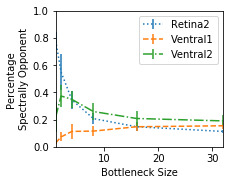

In [3]:
plt.figure(figsize=(3,2.5))

Ch_frame = pd.read_pickle('logs/devalois-ch.pd')
Ch_opps = load.spectral(Ch_frame, 'spectrally opponent')
retina2 = Ch_opps[Ch_opps['layer'] == 'retina_relu2']
ventral0 = Ch_opps[Ch_opps['layer'] == 'ventral_relu0']
ventral1 = Ch_opps[Ch_opps['layer'] == 'ventral_relu1']

plt.errorbar(retina2['n_bn'], retina2['mean_rel_amount'], yerr=retina2['std_rel_amount'], label='Retina2', linestyle=':')
plt.errorbar(ventral0['n_bn'], ventral0['mean_rel_amount'], yerr=ventral0['std_rel_amount'], label='Ventral1', linestyle='--')
plt.errorbar(ventral1['n_bn'], ventral1['mean_rel_amount'], yerr=ventral1['std_rel_amount'], label='Ventral2', linestyle='-.')

plt.xlabel('Bottleneck Size')
plt.ylabel('Percentage \nSpectrally Opponent')
plt.xlim(1, 32)
plt.ylim(0, 1)

plt.legend()

plt.savefig('figures/shuffled_spectral.pdf', bbox_inches='tight')